In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [51]:
data_b_NO2=pd.read_excel("/content/NO2_Data.xlsx",sheet_name='London')

In [52]:
check=pd.read_excel("/content/check.xlsx")

In [53]:
df_b_NO2=data_b_NO2.groupby('Year').agg(NO2_London=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,NO2_London
0,2000,51.000000
1,2001,49.111111
2,2002,44.833333
3,2003,52.941176
4,2004,50.333333


In [54]:
year=df_b_NO2['Year']
y_test=df_b_NO2['NO2_London']

In [55]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [56]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [57]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [60]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [61]:
y_pred = svm_classifier.predict(X_test)

In [62]:
y_pred

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Moderate',
       'Moderate', 'Moderate', 'Moderate', 'Moderate', 'Moderate',
       'Moderate', 'Moderate'], dtype=object)

In [63]:
df_b_NO2

,Year,NO2_London
0,2000,51.000000
1,2001,49.111111
2,2002,44.833333
3,2003,52.941176
4,2004,50.333333
5,2005,50.333333
6,2006,49.944444
7,2007,46.947368
8,2008,46.636364
9,2009,46.636364


In [64]:
classified_df=pd.DataFrame()

In [65]:
classifed_df=df_b_NO2[['Year','NO2_London']]

In [66]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [67]:
classifed_df

,Year,NO2_London,Checkpoints
0,2000,51.000000,High
1,2001,49.111111,High
2,2002,44.833333,High
3,2003,52.941176,High
4,2004,50.333333,High
5,2005,50.333333,High
6,2006,49.944444,High
7,2007,46.947368,High
8,2008,46.636364,High
9,2009,46.636364,High


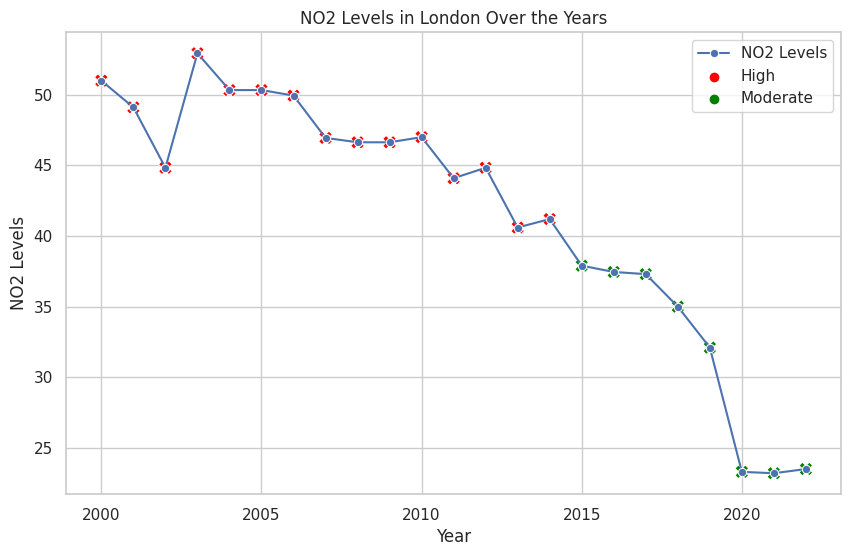

In [71]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='NO2_London', data=classifed_df, marker='o', label='NO2 Levels')
sns.scatterplot(x='Year', y='NO2_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['red', 'green'])
plt.xlabel('Year')
plt.ylabel('NO2 Levels')
plt.title('NO2 Levels in London Over the Years')
plt.legend()
plt.show()


In [72]:
from google.colab import files

In [73]:
csv_file_path = '/content/classified_London_NO2.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [74]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>